# ZINB copula approach

In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd


import importlib

## Example data

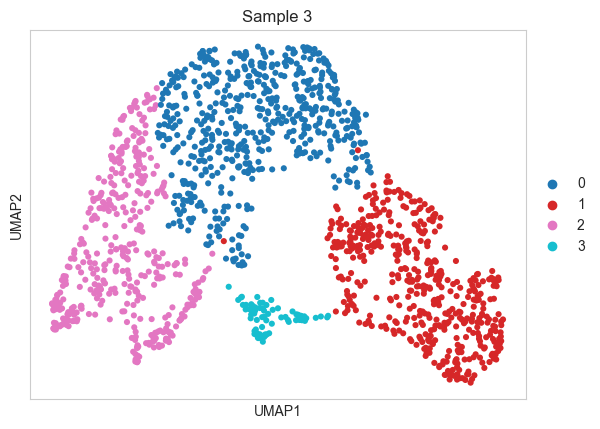

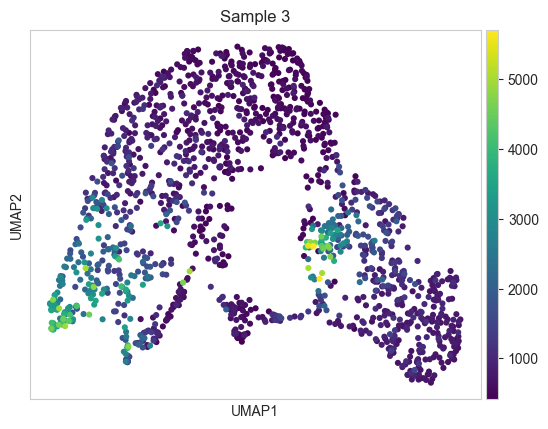

In [2]:
data_gene = sc.read_h5ad("../../data/MOBA_scRNAseq/outs_S3/filtered_data_maxpool_processed.h5ad")
sc.tl.leiden(data_gene, resolution=0.15, key_added="leiden_opt", random_state=1234)
sc.pl.umap(data_gene, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

sc.pl.umap(data_gene, color="total_counts", palette="tab10", title="Sample 3", cmap="viridis")
plt.show()

In [3]:
count_table = data_gene.layers["counts"].copy()

In [21]:
from statsmodels.discrete.discrete_model import NegativeBinomialP, NegativeBinomial, Poisson, GeneralizedPoisson
from statsmodels.discrete.count_model import (ZeroInflatedNegativeBinomialP, ZeroInflatedPoisson,
                                              ZeroInflatedGeneralizedPoisson)

In [32]:
print(data_gene.var["total_counts"].sort_values(ascending=False).head(10))

PAO1_ID
PA4244    19428.0
PA4264    18760.0
PA4256    14415.0
PA4262    11189.0
PA4260    10160.0
PA4932     9209.0
PA4248     8913.0
PA5559     8817.0
PA4261     8802.0
PA4237     7784.0
Name: total_counts, dtype: float64


[2. 2. 2. ... 0. 1. 1.]
Optimization terminated successfully.
         Current function value: 1.914647
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 y   No. Observations:                 1544
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     1543
Method:                                      MLE   Df Model:                            0
Date:                           Fri, 16 Feb 2024   Pseudo R-squ.:              -8.152e-07
Time:                                   14:59:13   Log-Likelihood:                -2956.2
converged:                                  True   LL-Null:                       -2956.2
Covariance Type:                       nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
--

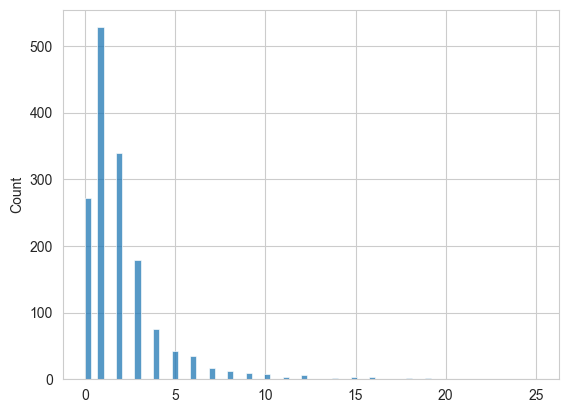

In [36]:
i = 4237

dat = count_table[:, i].toarray().T[0]
print(dat)
sns.histplot(dat)

model = ZeroInflatedNegativeBinomialP(dat, np.ones(count_table.shape[0]))
res_nb = model.fit(method='bfgs', maxiter=5000, maxfun=5000)
print(res_nb.summary())